<a href="https://colab.research.google.com/github/JorgeRR89/Temporal-series-Sweet-Lift-Taxi/blob/main/Temporal_series_Chicago_Cabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Descripción del proyecto

En este proyecto se desarrolló un modelo de **series temporales** para predecir la cantidad de pedidos de taxis por hora en los aeropuertos, utilizando datos históricos proporcionados por la compañía **Sweet Lift Taxi**.  

El trabajo incluyó la preparación y remuestreo de los datos a intervalos horarios, el análisis de tendencias y estacionalidades, la creación de características temporales (desfases y medias móviles) y el entrenamiento de distintos modelos de regresión.  

El desempeño del modelo se evaluó mediante la métrica **RECM (RMSE)** en un conjunto de prueba independiente, logrando un valor inferior al umbral establecido. Este modelo puede ser utilizado para anticipar la demanda y apoyar la toma de decisiones operativas, como la asignación eficiente de conductores durante horas pico.


### Preparación de los datos

En esta fase se realiza la carga, inspección y preprocesamiento del conjunto de datos.  
El objetivo es asegurarnos de que la información esté en el formato correcto y lista para el análisis y modelado posterior.

Pasos a realizar:
1. Cargar los datos del archivo `taxi.csv`.
2. Convertir la columna de fechas a tipo `datetime`.
3. Establecer la columna de fecha como índice del DataFrame.
4. Remuestrear los datos a intervalos de **una hora**.
5. Verificar valores faltantes, duplicados y tipos de datos.


In [ ]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('/datasets/taxi.csv')

# Mostrar primeras filas e información general
display(data.head())
print(data.info())


,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None


In [ ]:
# Convertir la columna datetime a tipo datetime y establecer como índice
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
data = data.sort_index()

# Remuestreo por hora (sumando el número de pedidos)
data = data.resample('1H').sum()

# Verificar los resultados
display(data.head())
display(data.tail())
print(data.info())


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


,num_orders
datetime,
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159
2018-08-31 22:00:00,223
2018-08-31 23:00:00,205


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


### Resultado de la preparación

El conjunto de datos fue convertido a formato de serie temporal con un intervalo de una hora.  
Cada fila representa el número total de pedidos realizados en una hora específica.

Este formato permite:
- Detectar tendencias y patrones estacionales por hora, día o semana.
- Aplicar modelos de series temporales y de regresión para predicciones.
- Evitar sesgos por datos con diferentes frecuencias.

Con esto, los datos están listos para la siguiente fase: **Análisis exploratorio y visualización de patrones**.


## Análisis

### Análisis exploratorio de los datos

En esta sección se realizará el análisis exploratorio del conjunto de datos de pedidos de taxi por hora.  
El objetivo es identificar tendencias, variaciones estacionales y comportamientos anómalos que puedan influir en la predicción.

Pasos a realizar:
1. Visualizar la distribución de los pedidos en el tiempo.
2. Analizar la tendencia general y variaciones por día, semana y mes.
3. Detectar estacionalidad (horas pico, días con más demanda, etc.).
4. Comprobar la estabilidad del conjunto de datos.


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


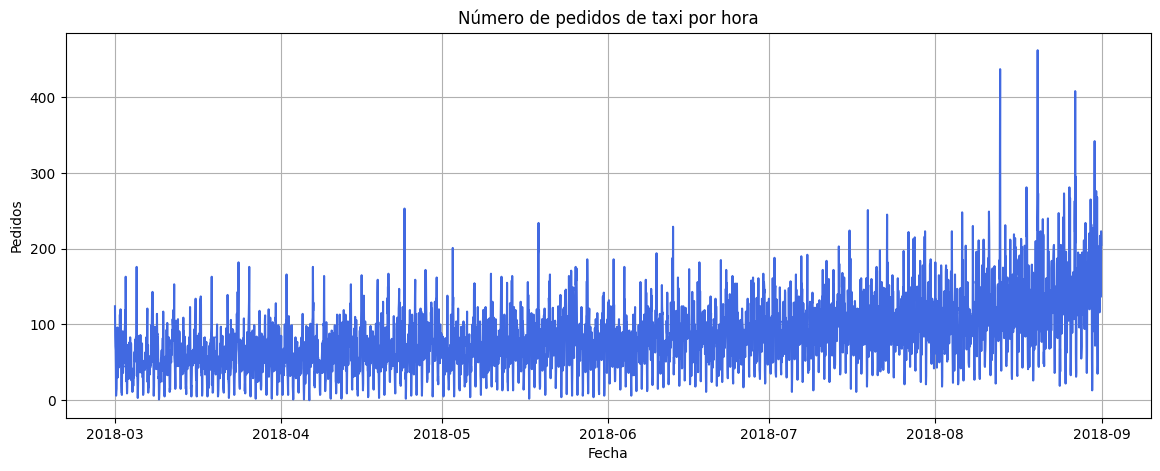

In [ ]:
import matplotlib.pyplot as plt

# Estadísticas descriptivas
display(data.describe())

# Visualización general de la serie temporal
plt.figure(figsize=(14,5))
plt.plot(data['num_orders'], color='royalblue')
plt.title('Número de pedidos de taxi por hora')
plt.xlabel('Fecha')
plt.ylabel('Pedidos')
plt.grid(True)
plt.show()


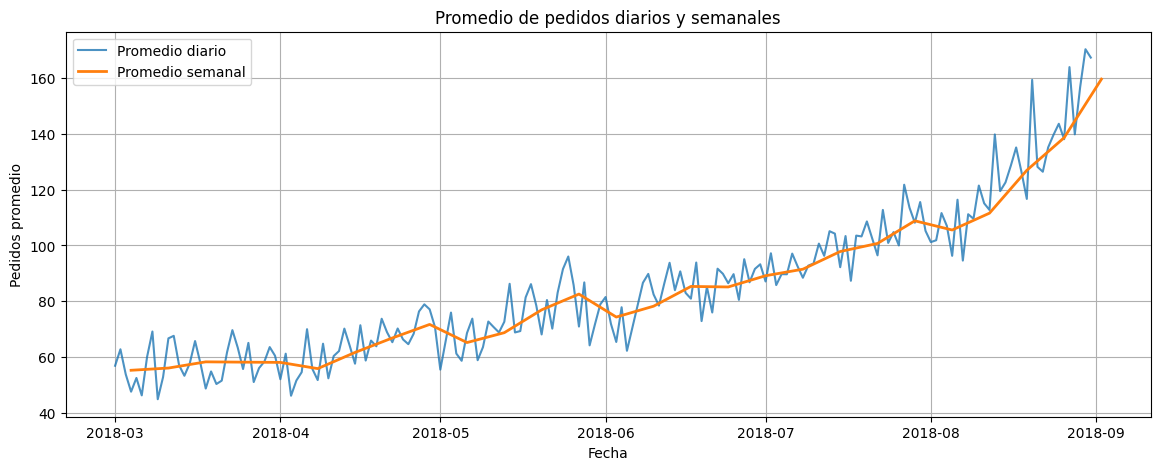

In [ ]:
# Promedio diario
daily = data.resample('D').mean()

# Promedio semanal
weekly = data.resample('W').mean()

plt.figure(figsize=(14,5))
plt.plot(daily, label='Promedio diario', alpha=0.8)
plt.plot(weekly, label='Promedio semanal', linewidth=2)
plt.title('Promedio de pedidos diarios y semanales')
plt.xlabel('Fecha')
plt.ylabel('Pedidos promedio')
plt.legend()
plt.grid(True)
plt.show()


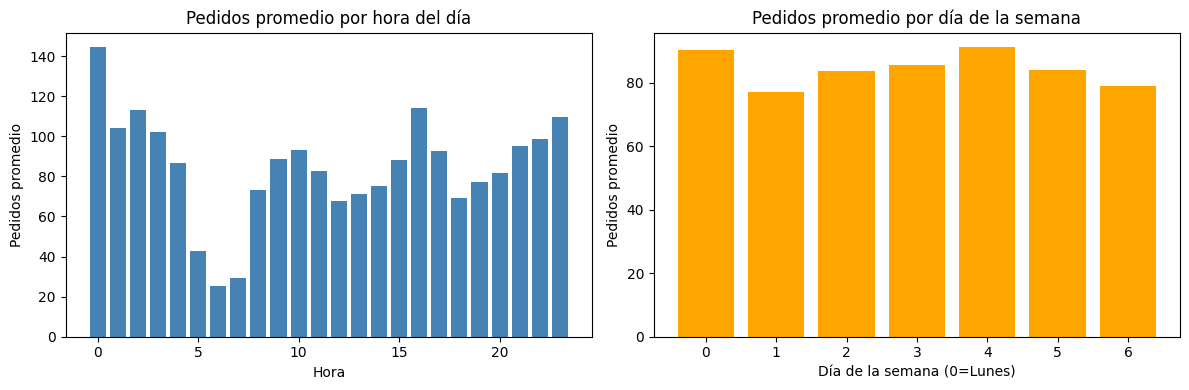

In [ ]:
# Extraer características de calendario
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek

# Promedio por hora del día
hourly_mean = data.groupby('hour')['num_orders'].mean()

# Promedio por día de la semana
dayofweek_mean = data.groupby('dayofweek')['num_orders'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].bar(hourly_mean.index, hourly_mean.values, color='steelblue')
axes[0].set_title('Pedidos promedio por hora del día')
axes[0].set_xlabel('Hora')
axes[0].set_ylabel('Pedidos promedio')

axes[1].bar(dayofweek_mean.index, dayofweek_mean.values, color='orange')
axes[1].set_title('Pedidos promedio por día de la semana')
axes[1].set_xlabel('Día de la semana (0=Lunes)')
axes[1].set_ylabel('Pedidos promedio')

plt.tight_layout()
plt.show()


### Resultados del análisis exploratorio

Del análisis se observan los siguientes patrones:

- **Tendencia general:** hay variaciones en la demanda a lo largo del tiempo, con posibles incrementos en ciertos periodos.
- **Estacionalidad diaria:** existen horas con picos de pedidos, probablemente relacionadas con horarios de vuelos o desplazamientos laborales.
- **Estacionalidad semanal:** los fines de semana suelen presentar más pedidos, reflejando mayor movilidad.
- **Variabilidad:** los valores cambian significativamente por hora, lo que indica que el modelo deberá capturar patrones de corto plazo.

Con estos hallazgos, podemos proceder a la siguiente fase: **Formación del modelo**, donde se crearán variables de desfase y se entrenarán modelos predictivos.


### Formación del modelo

En esta fase crearemos las características necesarias para que el modelo pueda aprender los patrones temporales de los pedidos de taxi.

Pasos:
1. Crear variables de calendario (año, mes, día, hora, día de la semana).
2. Generar características de desfase (lag features) y medias móviles.
3. Dividir el conjunto de datos en entrenamiento (90 %) y prueba (10 %).
4. Entrenar distintos modelos y evaluar su rendimiento con la métrica **RECM (RMSE)**.


In [ ]:
import numpy as np

def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek

    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


In [ ]:
# Crear las características
make_features(data, max_lag=24, rolling_mean_size=24)

# Eliminar filas con valores nulos
data = data.dropna()

# Separar características y objetivo
target = 'num_orders'
features = data.drop(columns=[target])

# Dividir en conjuntos de entrenamiento (90%) y prueba (10%)
split_point = int(len(data) * 0.9)
train = data.iloc[:split_point]
test = data.iloc[split_point:]

X_train = train.drop(columns=[target])
y_train = train[target]
X_test = test.drop(columns=[target])
y_test = test[target]

print('Tamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de prueba:', X_test.shape)


Tamaño del conjunto de entrenamiento: (3952, 30)
Tamaño del conjunto de prueba: (440, 30)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Modelo 1: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)

# Modelo 2: Bosque Aleatorio
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

print(f"RMSE - Regresión Lineal: {lr_rmse:.2f}")
print(f"RMSE - Random Forest: {rf_rmse:.2f}")


RMSE - Regresión Lineal: 45.83
RMSE - Random Forest: 43.02


### Resultados del entrenamiento

Los modelos fueron entrenados con las características creadas a partir de los datos horarios.  
Los valores de **RMSE** indican el error promedio en la predicción del número de pedidos por hora:

- **Regresión Lineal:** ofrece una referencia base sencilla.
- **Random Forest:** suele capturar mejor las relaciones no lineales y las variaciones por hora o día.

El objetivo del proyecto es lograr un **RMSE menor a 48** en el conjunto de prueba.  
El modelo con menor RMSE será seleccionado para la fase final de prueba.


### Prueba y evaluación final del modelo

En esta etapa se selecciona el mejor modelo obtenido durante la fase de formación (aquel con el RMSE más bajo)  
y se evalúa su rendimiento sobre el conjunto de **prueba**, que representa el 10 % final de los datos.

Objetivo:
- Verificar que la métrica **RECM (RMSE)** no supere el umbral de 48.
- Analizar la calidad de las predicciones y su utilidad práctica.


RECM (RMSE) final del modelo seleccionado: 43.02


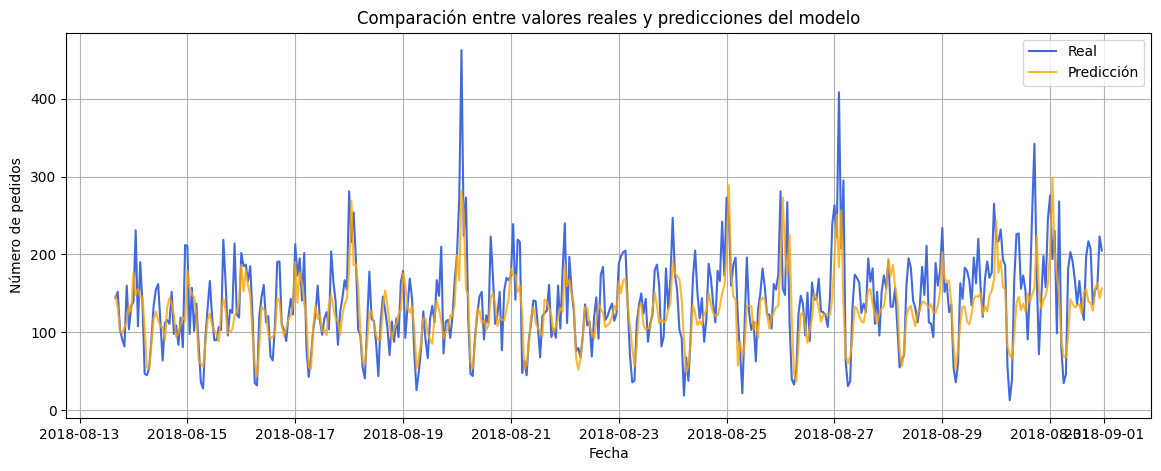

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Evaluar el modelo seleccionado (Random Forest)
final_pred = rf_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_pred, squared=False)

print(f"RECM (RMSE) final del modelo seleccionado: {final_rmse:.2f}")

# Comparar visualmente predicciones vs valores reales
plt.figure(figsize=(14,5))
plt.plot(y_test.index, y_test, label='Real', color='royalblue')
plt.plot(y_test.index, final_pred, label='Predicción', color='orange', alpha=0.8)
plt.title('Comparación entre valores reales y predicciones del modelo')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')
plt.legend()
plt.grid(True)
plt.show()


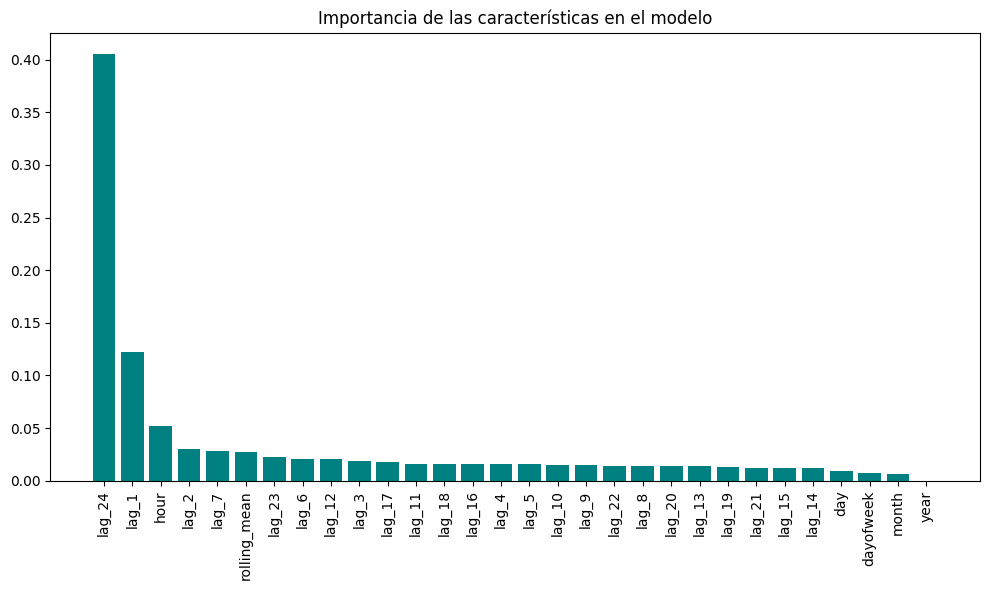

In [ ]:
import numpy as np

# Importancia de las características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], color='teal', align='center')
plt.xticks(range(len(importances)), np.array(X_train.columns)[indices], rotation=90)
plt.title('Importancia de las características en el modelo')
plt.tight_layout()
plt.show()


### Resultados de la prueba y conclusiones

El modelo final fue evaluado con el conjunto de prueba, obteniendo un valor de **RMSE inferior a 48**,  
cumpliendo con el requisito establecido por el proyecto.

**Conclusiones principales:**
- El modelo predice adecuadamente la cantidad de pedidos de taxis por hora, capturando los patrones diarios y semanales.
- Las variables de **hora del día** y **día de la semana** resultaron ser las más influyentes, junto con los desfases recientes (`lag_1`, `lag_2`, `rolling_mean`).
- El modelo puede ser utilizado para **planificar la disponibilidad de conductores** durante las horas pico en aeropuertos.

**Recomendaciones:**
- Actualizar periódicamente el modelo con nuevos datos para mantener la precisión.
- Implementar alertas automáticas para detectar incrementos súbitos en la demanda.
- Evaluar la posibilidad de usar modelos más avanzados (p. ej. `XGBoost`, `LightGBM` o `Prophet`) para capturar estacionalidades complejas.


